Detailed explanation on the solution will be provided here. 
Split the following function in different parts, so it is easier to understand.

Finally, refactor and optimize the code, only with necessary parts.


the grid_centers: {0: (0.5, 0.5), 1: (0.5, 1.5), 2: (0.5, 2.5), 3: (0.5, 3.5), 4: (1.5, 0.5), 5: (1.5, 1.5), 6: (1.5, 2.5), 7: (1.5, 3.5), 8: (2.5, 0.5), 9: (2.5, 1.5), 10: (2.5, 2.5), 11: (2.5, 3.5), 12: (3.5, 0.5), 13: (3.5, 1.5), 14: (3.5, 2.5), 15: (3.5, 3.5)}
point_id: 1
the grid_centers: {0: (0.5, 0.5), 1: (0.5, 1.5), 2: (0.5, 2.5), 3: (0.5, 3.5), 4: (1.5, 0.5), 5: (1.5, 1.5), 6: (1.5, 2.5), 7: (1.5, 3.5), 8: (2.5, 0.5), 9: (2.5, 1.5), 10: (2.5, 2.5), 11: (2.5, 3.5), 12: (3.5, 0.5), 13: (3.5, 1.5), 14: (3.5, 2.5), 15: (3.5, 3.5)}
point_id: 11
the grid_centers: {0: (0.5, 0.5), 1: (0.5, 1.5), 2: (0.5, 2.5), 3: (0.5, 3.5), 4: (1.5, 0.5), 5: (1.5, 1.5), 6: (1.5, 2.5), 7: (1.5, 3.5), 8: (2.5, 0.5), 9: (2.5, 1.5), 10: (2.5, 2.5), 11: (2.5, 3.5), 12: (3.5, 0.5), 13: (3.5, 1.5), 14: (3.5, 2.5), 15: (3.5, 3.5)}
point_id: 15
Grid center walks to userOD processed: 0 arcs added.

Grid center walks to bikeStation processed: 16 arcs added.

Grid center walks to publicTransportStop processed: 3

Processing user OD nodes: 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]

Quantity of multi-modal trips:
  - {'Bike', 'Walk'}: 188
  - {'Bike', 'Walk', 'PT_1'}: 111
  - {'PT_1', 'Walk'}: 6
  - {'PT_1', 'Bike', 'Walk'}: 13
------------------
Proportion of disconnected OD pairs: 0.0292
------------------
✅ The shortest path calculation is complete and has been stored in the cache file!
Restricted license - for non-production use only - expires 2026-11-23
=== Sets Initialization Completed ===
Total OD pairs (K): 318
Total Bike Stations (B): 16
=== Parameters Initialization Completed ===
Start setting variables
=== Variables Initialization Completed ===
=== Objectives Initialization Completed ===
=== Constraints Initialization Completed ===
Final total constraints count: 0
Set parameter TimeLimit to value 1800
Set parameter Method to value 3


---------------------------
Statistics for model 'NetworkDesign':
  Problem type                : MIP
  Linear constraint matrix    : 717 rows, 714 columns, 1765 nonzeros
  Variable types              : 0 continuous, 714 integer (145 binary)
  Matrix range                : [1e+00, 1e+06]
  Objective range             : [8e-01, 9e-01]
  Bounds range                : [1e+00, 1e+01]
  RHS range                   : [1e+00, 2e+04]
---------------------------
✅ Gurobi 结果已保存到 gurobi_results_4*4_20250401_170820.json

✅ 选定的站点（y=1）及其初始库存 v 和容量 z：
🚲 站点 Node(BS-0, coordinate=(0.5, 0.5), is_origin=False, : y = 1.0, v(initial inventory) = 10.0, z(capacity) = 10.0
🚲 站点 Node(BS-1, coordinate=(0.5, 1.5), is_origin=False, : y = 1.0, v(initial inventory) = 10.0, z(capacity) = 10.0
🚲 站点 Node(BS-2, coordinate=(0.5, 2.5), is_origin=False, : y = 1.0, v(initial inventory) = 10.0, z(capacity) = 10.0
🚲 站点 Node(BS-3, coordinate=(0.5, 3.5), is_origin=False, : y = 1.0, v(initial inventory) = 10.0, z(capacity) = 10

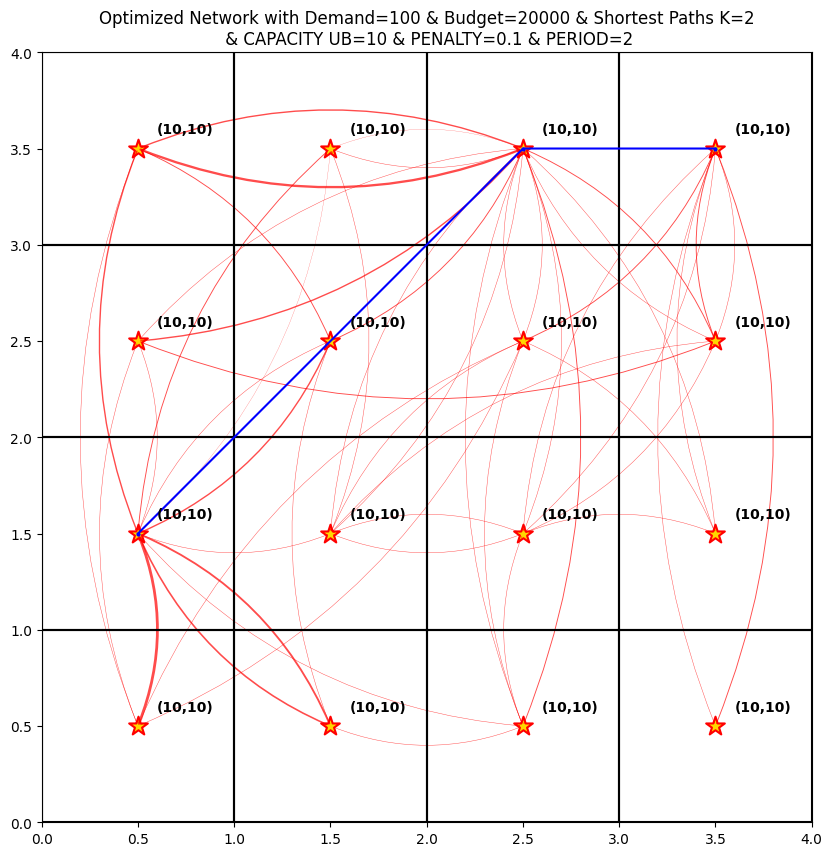

In [1]:
from input_handler.preprocess import preprocess
from output_handler.visualize import Visualize
from model.bike_sharing_optimization import BikeSharingModel
from network.network_constructor import NetworkConstructor
from shortest_path.shortest_path_solver import ShortestPathSolver
from datetime import datetime
from util.util import *
from util.cost import CostParameters
import json
from tqdm import tqdm

def run_simulation(): 
    start_time = datetime.datetime.now()

    grid_generator, public_transport, bike_stations, demand_generator = preprocess(AREA_LENGTH, AREA_WIDTH, CELL_SIZE)
    G, grid_centers = grid_generator.grid, grid_generator.grid_centers
    network = NetworkConstructor(G, grid_generator, public_transport, bike_stations)
    shortest_path_solver = ShortestPathSolver(network.graph, k=NUM_SHORTEST_PATHS)
    model = BikeSharingModel(network, shortest_path_solver, demand_generator)

    end_time = datetime.datetime.now()
    elapsed_time = end_time - start_time
    print(f"Execution time: {elapsed_time}")

    Visualize(grid_generator, public_transport, shortest_path_solver, demand_generator, model)
    

run_simulation()